# Importation des dépendances

In [2]:
# Installer les bibliothèques nécessaires
%pip install scikit-learn matplotlib pillow

# Importer les bibliothèques
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from PIL import Image
from sklearn.pipeline import make_pipeline

Note: you may need to restart the kernel to use updated packages.


# Déclaration des dossiers d'entrainement et de test

Ces 2 dossiers contiennent des images de pions de jeu d'échecs, les images sont différentes entre le dossier "/Train" et "/Test"
<br />
Le but est que les images soient différentes pour vérifier si le modèle a bien appris

In [3]:
base_dir = os.path.abspath('./ChessDataset')
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

In [4]:
# Fonction pour charger les images et les étiquettes
def load_data(data_dir):
    images = []
    labels = []
    class_names = os.listdir(data_dir)
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = Image.open(img_path).convert('RGB')
                img = img.resize((150, 150))
                img_array = np.array(img).flatten()
                images.append(img_array)
                labels.append(class_name)
    return np.array(images), np.array(labels), class_names

In [5]:
X_train, y_train, class_names = load_data(train_dir)
X_test, y_test, _ = load_data(test_dir)

## Division des données en ensembles d'entraînement et de validation

Pour évaluer les performances du modèle de manière fiable, il est important de diviser les données en ensembles d'entraînement et de validation. Cela permet de s'assurer que le modèle est capable de généraliser à des données qu'il n'a pas vues pendant l'entraînement.


J'utilise la fonction `train_test_split` de sklearn pour diviser les données d'entraînement en deux ensembles : un ensemble d'entraînement et un ensemble de validation. Voici comment cela est fait :


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
# Créer un pipeline avec un scaler et un SVM
ChessModel = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))

# Entrainement

In [8]:
# Entraîner le modèle
ChessModel.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', probability=True))])

# Evaluer

In [9]:
# Évaluer le modèle sur l'ensemble de validation
y_val_pred = ChessModel.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(classification_report(y_val, y_val_pred, target_names=class_names))

# Évaluer le modèle sur l'ensemble de test
y_test_pred = ChessModel.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(classification_report(y_test, y_test_pred, target_names=class_names))


Validation Accuracy: 0.3571
              precision    recall  f1-score   support

    Cavalier       0.60      0.31      0.41        29
         Fou       0.46      0.61      0.52        18
        Pion       0.33      0.48      0.39        21
       Reine       0.12      0.14      0.13        14
         Roi       0.27      0.23      0.25        13
        Tour       0.31      0.29      0.30        17

    accuracy                           0.36       112
   macro avg       0.35      0.34      0.34       112
weighted avg       0.39      0.36      0.36       112

Test Accuracy: 0.1818
              precision    recall  f1-score   support

    Cavalier       0.19      0.11      0.14        71
         Fou       0.16      0.24      0.19        67
        Pion       0.56      0.17      0.26       239
       Reine       0.08      0.18      0.11        34
         Roi       0.04      0.12      0.06        34
        Tour       0.16      0.28      0.20        72

    accuracy               

# Fonction pour afficher les images et les prédictions


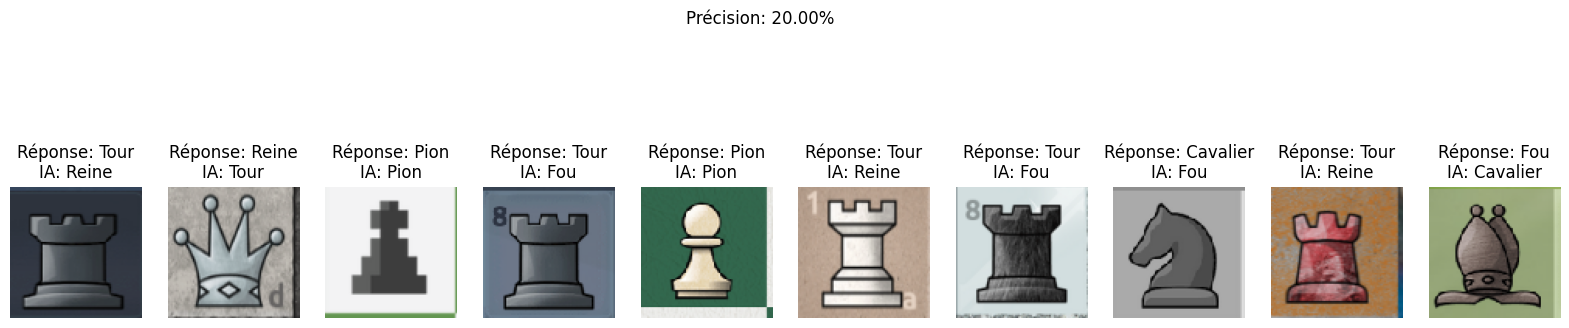

In [10]:
# Fonction pour afficher les images et les prédictions
def display_predictions(model, test_dir, class_names, num_images=10):
    test_images = []
    test_labels = []
    for class_name in os.listdir(test_dir):
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                test_images.append(img_path)
                test_labels.append(class_name)

    indices = np.random.choice(len(test_images), num_images, replace=False)
    
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    correct_predictions = 0
    for ax, i in zip(axes, indices):
        img_path = test_images[i]
        true_label = test_labels[i]
        img = Image.open(img_path).convert('RGB')
        img_resized = img.resize((150, 150))
        img_array = np.array(img_resized).flatten().reshape(1, -1)
        
        prediction = model.predict(img_array)
        predicted_label = prediction[0]

        if predicted_label == true_label:
            correct_predictions += 1

        ax.imshow(img)
        ax.set_title(f"Réponse: {true_label}\nIA: {predicted_label}")
        ax.axis('off')

    accuracy = (correct_predictions / num_images) * 100
    plt.suptitle(f"Précision: {accuracy:.2f}%")
    plt.show()

# Afficher les prédictions pour quelques images de test
display_predictions(ChessModel, test_dir, class_names, num_images=10)

# Arbre de décision

In [11]:
# Entraîner un arbre de décision
tree_Chessmodel = DecisionTreeClassifier(random_state=42)
tree_Chessmodel.fit(X_train, y_train)

# Évaluer l'arbre de décision sur l'ensemble de test
y_test_pred_tree = tree_Chessmodel.predict(X_test)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)
print(f'Test Accuracy (Decision Tree): {test_accuracy_tree:.4f}')
print(classification_report(y_test, y_test_pred_tree, target_names=class_names))

# Visualiser l'arbre de décision
plt.figure(figsize=(200, 100), dpi=100)
plot_tree(tree_Chessmodel, filled=True, feature_names=None, class_names=class_names, rounded=True)
plt.show()

Test Accuracy (Decision Tree): 0.2186
              precision    recall  f1-score   support

    Cavalier       0.15      0.20      0.17        71
         Fou       0.13      0.24      0.17        67
        Pion       0.48      0.27      0.34       239
       Reine       0.05      0.06      0.06        34
         Roi       0.00      0.00      0.00        34
        Tour       0.16      0.24      0.19        72

    accuracy                           0.22       517
   macro avg       0.16      0.17      0.15       517
weighted avg       0.28      0.22      0.23       517

